In [1]:
# -*- coding: utf-8 -*-

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score 
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.lines as mlines
import seaborn as sns
np.random.seed(123)
df=pd.read_csv(r'C:\luyan\paper_code\data\cluster_thermal_preference_data.csv')
df.head(5)

,id,trigger_temp_mean,trigger_temp_median,trigger_temp_std,trigger_temp_skew,trigger_temp_kurt,duration_mean,duration_median,duration_std,duration_skew,...,set_point_weight_mean_median,set_point_weight_mean_std,set_point_weight_mean_skew,set_point_weight_mean_kurt,set_point_num_mean,set_point_num_median,set_point_num_std,set_point_num_skew,set_point_num_kurt,ac_type
0,0007A88A4D8D,27.842029,27.80,1.502782,-0.076451,0.755470,12.594447,13.058577,5.691970,0.107820,...,21.551834,1.804175,0.315058,-0.698538,2.024390,2.0,0.724148,0.764151,1.082201,f_s
1,0007A88B9A54,26.964615,27.10,1.139686,-0.498886,0.186714,5.702652,3.561026,5.107522,1.646614,...,25.000000,0.600650,0.246813,0.177471,1.347826,1.0,0.525670,1.096471,0.105140,f_s
2,0007A88B9C97,28.590000,28.75,2.076091,0.267460,-0.598157,7.837327,7.230340,5.481980,0.890935,...,24.000000,1.805697,0.076723,-0.825857,1.218750,1.0,0.659148,3.184473,9.473474,f_s
3,0007A88BA9B4,31.655556,31.55,0.931932,0.856593,0.032713,8.506129,6.108834,6.884634,0.484943,...,27.899772,1.658793,-0.827342,-0.148644,1.937500,2.0,0.853913,0.116629,-1.527837,w_m
4,0007A88BCE80,30.160465,29.90,1.448010,0.265062,-0.487133,11.632479,10.967803,5.422689,0.534327,...,25.185073,2.856039,-1.680846,2.109503,1.756098,2.0,0.734183,0.791228,0.547987,w_m


In [2]:
dfwm=df[df['ac_type']=='w_m']
dffs=df[df['ac_type']=='f_s']

id_wm=dfwm['id']
id_fs=dffs['id']

dfwm=df[df['ac_type']=='w_m'].drop(columns=['id','ac_type'])
dffs=df[df['ac_type']=='f_s'].drop(columns=['id','ac_type'])

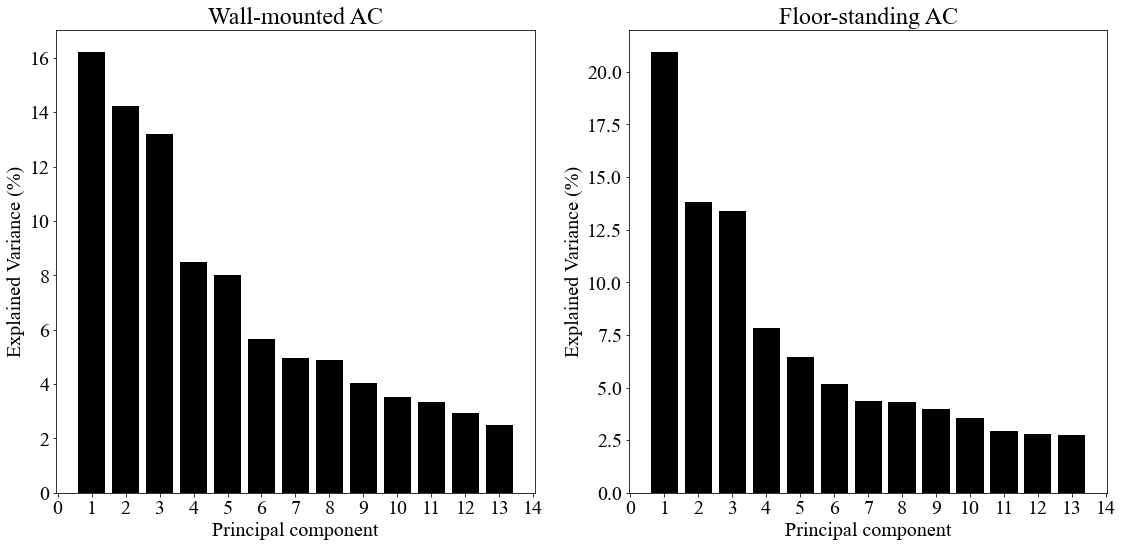

In [3]:
np.random.seed(123)
dfcluster_wm=dfwm
x_std_wm = StandardScaler().fit_transform(dfcluster_wm)
pca_wm = PCA(n_components=0.9)

principalcomponents_wm = pca_wm.fit_transform(x_std_wm)
pca_components_wm = pd.DataFrame(principalcomponents_wm)
# Plot the explained variances

plt.rc("font",family="Times New Roman",size=20)
plt.figure(figsize=(16, 8))
features_wm = range(1,pca_wm.n_components_+1)
ax=plt.subplot(1,2,1)
plt.bar(features_wm, 100*pca_wm.explained_variance_ratio_, color='black')
plt.xlabel('Principal component')
plt.ylabel('Explained Variance (%)')
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.title('Wall-mounted AC')

dfcluster_fs=dffs
x_std_fs = StandardScaler().fit_transform(dfcluster_fs)

pca_fs = PCA(n_components=0.9)

principalcomponents_fs = pca_fs.fit_transform(x_std_fs)
pca_components_fs = pd.DataFrame(principalcomponents_fs)
# Plot the explained variances
features_fs = range(1,pca_fs.n_components_+1)
ax=plt.subplot(1,2,2)
plt.bar(features_fs, 100*pca_fs.explained_variance_ratio_, color='black')
plt.xlabel('Principal component')
plt.ylabel('Explained Variance (%)')
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.title('Floor-standing AC')

plt.tight_layout()

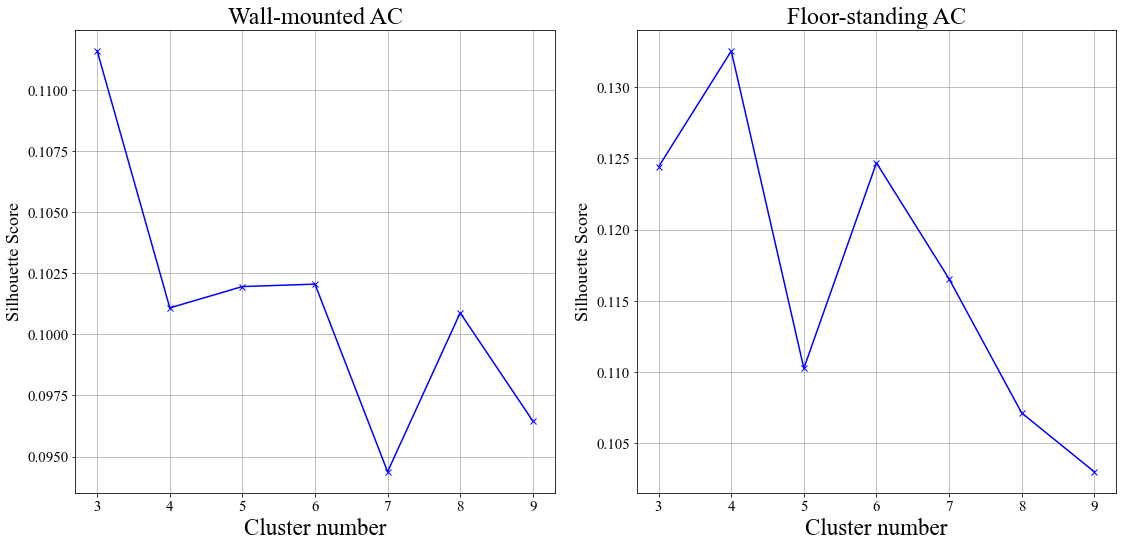

In [4]:
np.random.seed(123)
clusters = range(3,10)
sc_scores_wm = []
sc_scores_fs = []
klist=[]
for k in clusters:  
    kmeans_model = KMeans(n_clusters=k).fit(np.array(pca_components_wm))
    sc_score =silhouette_score(np.array(pca_components_wm), kmeans_model.labels_)
    sc_scores_wm.append(sc_score)
    klist.append(k)

for k in clusters:  
    kmeans_model = KMeans(n_clusters=k).fit(np.array(pca_components_fs))
    sc_score =silhouette_score(np.array(pca_components_fs), kmeans_model.labels_)
    sc_scores_fs.append(sc_score)
    klist.append(k)
    

plt.rc("font",family="Times New Roman",size=20)
plt.figure(figsize=(16, 8))
ax=plt.subplot(1,2,1)

ax.xaxis.set_major_locator(MultipleLocator(1))
plt.plot(clusters, sc_scores_wm, 'bx-')

plt.xlabel('Cluster number',fontsize=23)
plt.ylabel('Silhouette Score',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.title('Wall-mounted AC')

ax=plt.subplot(1,2,2)

ax.xaxis.set_major_locator(MultipleLocator(1))
plt.plot(clusters, sc_scores_fs, 'bx-')

plt.xlabel('Cluster number',fontsize=23)
plt.ylabel('Silhouette Score',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.title('Floor-standing AC')


plt.tight_layout()


In [5]:
np.random.seed(123)
labels_wm = KMeans(n_clusters=3).fit(np.array(pca_components_wm)).labels_

n_counts_wm=pd.crosstab(labels_wm,labels_wm)

dflabel_wm=pd.DataFrame()
dflabel_wm['id']=id_wm
dflabel_wm['thermal_type']=labels_wm


dfcluster_result_wm=pd.merge(dflabel_wm,df,on='id')

dfcluster_center_wm=dfcluster_result_wm.groupby('thermal_type').mean()

dfcluster_center_explain_wm=dfcluster_center_wm[['set_point_weight_mean_mean','set_point_num_mean','trigger_temp_mean','temp_in_mean','duration_mean']]


In [6]:
np.random.seed(123)
labels_fs = KMeans(n_clusters=4).fit(np.array(pca_components_fs)).labels_

n_counts_fs=pd.crosstab(labels_fs,labels_fs)

dflabel_fs=pd.DataFrame()
dflabel_fs['id']=id_fs
dflabel_fs['thermal_type']=labels_fs




dfcluster_result_fs=pd.merge(dflabel_fs,df,on='id')

dfcluster_center_fs=dfcluster_result_fs.groupby('thermal_type').mean()

dfcluster_center_explain_fs=dfcluster_center_fs[['set_point_weight_mean_mean','set_point_num_mean','trigger_temp_mean','temp_in_mean','duration_mean']]


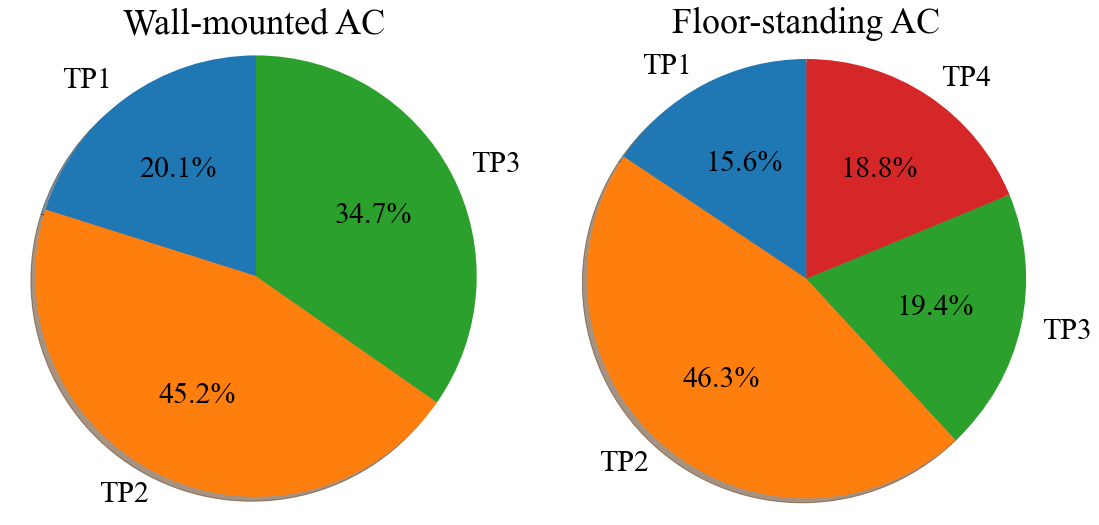

In [7]:
dis_wm=np.array(n_counts_wm).flatten()
dis_wm=dis_wm[dis_wm!=0]
labels_wm = 'TP1', 'TP2', 'TP3'
dis_fs=np.array(n_counts_fs).flatten()
dis_fs=dis_fs[dis_fs!=0]
labels_fs = 'TP1', 'TP2', 'TP3', 'TP4'

plt.rc("font",family="Times New Roman",size=30)
fig,ax= plt.subplots(1,2,figsize=(16,8))
ax[0].pie(dis_wm, labels=labels_wm, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title('Wall-mounted AC')

ax[1].pie(dis_fs, labels=labels_fs, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].set_title('Floor-standing AC')
plt.tight_layout()
plt.show()

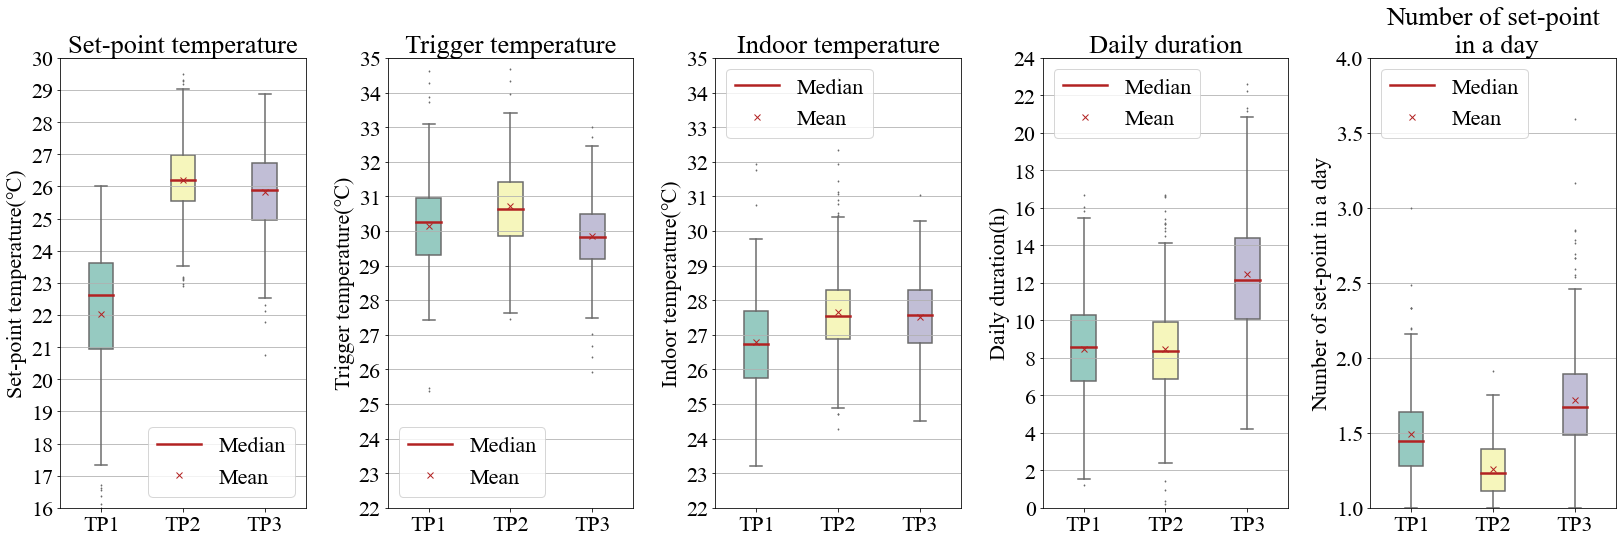

In [38]:
plt.rc("font",family="Times New Roman",size=22)
plt.figure(figsize=(23, 8))

medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='x',markerfacecolor='firebrick',markeredgecolor='firebrick')
m1=mlines.Line2D([],[],linestyle='-', linewidth=2.5, color='firebrick')
m2=mlines.Line2D([],[],linestyle=' ',marker='x',markerfacecolor='firebrick',markeredgecolor='firebrick')

plt.subplot(151)

ax=sns.boxplot(x="thermal_type",y="set_point_weight_mean_mean",fliersize=1,data=dfcluster_result_wm,palette="Set3",width=0.3,**{'showmeans':True,'medianprops':medianprops,'meanprops':meanpointprops}) 
ymajorLocator = MultipleLocator(1)
handles, labels = ax.get_legend_handles_labels()
labels=["Median","Mean"]
handles.append(m1)
handles.append(m2)
plt.legend(handles,labels,loc=4)
ax.yaxis.set_major_locator(ymajorLocator)
plt.ylim((16,30))
plt.xlabel(r"")
plt.ylabel(r"Set-point temperature(℃)")
plt.xticks(np.arange(3),[u"TP1",u"TP2",u"TP3"])
plt.yticks()
ax.grid(axis='y')
plt.title('Set-point temperature')

plt.subplot(152)
ax=sns.boxplot(x="thermal_type",y="trigger_temp_mean",fliersize=1,data=dfcluster_result_wm,palette="Set3",width=0.3,**{'showmeans':True,'medianprops':medianprops,'meanprops':meanpointprops}) 
ymajorLocator = MultipleLocator(1)
handles, labels = ax.get_legend_handles_labels()
labels=["Median","Mean"]
handles.append(m1)
handles.append(m2)
plt.legend(handles,labels,loc=3)
ax.yaxis.set_major_locator(ymajorLocator)
plt.ylim((22,35))
plt.xlabel(r"")
plt.ylabel(r"Trigger temperature(℃)")
plt.xticks(np.arange(3),[u"TP1",u"TP2",u"TP3"])
plt.yticks()
ax.grid(axis='y')
plt.title('Trigger temperature')

plt.subplot(153)
ax=sns.boxplot(x="thermal_type",y="temp_in_mean",fliersize=1,data=dfcluster_result_wm,palette="Set3",width=0.3,**{'showmeans':True,'medianprops':medianprops,'meanprops':meanpointprops}) 
ymajorLocator = MultipleLocator(1)
handles, labels = ax.get_legend_handles_labels()
labels=["Median","Mean"]
handles.append(m1)
handles.append(m2)
plt.legend(handles,labels,loc=2)
ax.yaxis.set_major_locator(ymajorLocator)
plt.ylim((22,35))
plt.xlabel(r"")
plt.ylabel(r"Indoor temperature(℃)")
plt.xticks(np.arange(3),[u"TP1",u"TP2",u"TP3"])
plt.yticks()
ax.grid(axis='y')
plt.title('Indoor temperature')

plt.subplot(154)
ax=sns.boxplot(x="thermal_type",y="duration_mean",fliersize=1,data=dfcluster_result_wm,palette="Set3",width=0.3,**{'showmeans':True,'medianprops':medianprops,'meanprops':meanpointprops}) 
ymajorLocator = MultipleLocator(2)
handles, labels = ax.get_legend_handles_labels()
labels=["Median","Mean"]
handles.append(m1)
handles.append(m2)
plt.legend(handles,labels,loc=2)
ax.yaxis.set_major_locator(ymajorLocator)
plt.ylim((0,24))
plt.xlabel(r"")
plt.ylabel(r"Daily duration(h)")
plt.xticks(np.arange(3),[u"TP1",u"TP2",u"TP3"])
plt.yticks()
ax.grid(axis='y')
plt.title('Daily duration')

plt.subplot(155)
ax=sns.boxplot(x="thermal_type",y="set_point_num_mean",fliersize=1,data=dfcluster_result_wm,palette="Set3",width=0.3,**{'showmeans':True,'medianprops':medianprops,'meanprops':meanpointprops}) 
ymajorLocator = MultipleLocator(0.5)
handles, labels = ax.get_legend_handles_labels()
labels=["Median","Mean"]
handles.append(m1)
handles.append(m2)
plt.legend(handles,labels,loc=2)
ax.yaxis.set_major_locator(ymajorLocator)
plt.ylim((1,4))
plt.xlabel(r"")
plt.ylabel(r"Number of set-point in a day")
plt.xticks(np.arange(3),[u"TP1",u"TP2",u"TP3"])
plt.yticks()
ax.grid(axis='y')
plt.title('Number of set-point\n in a day')

plt.tight_layout()
plt.savefig(r'C:\luyan\fig\fig5a1.jpg',dpi=600)

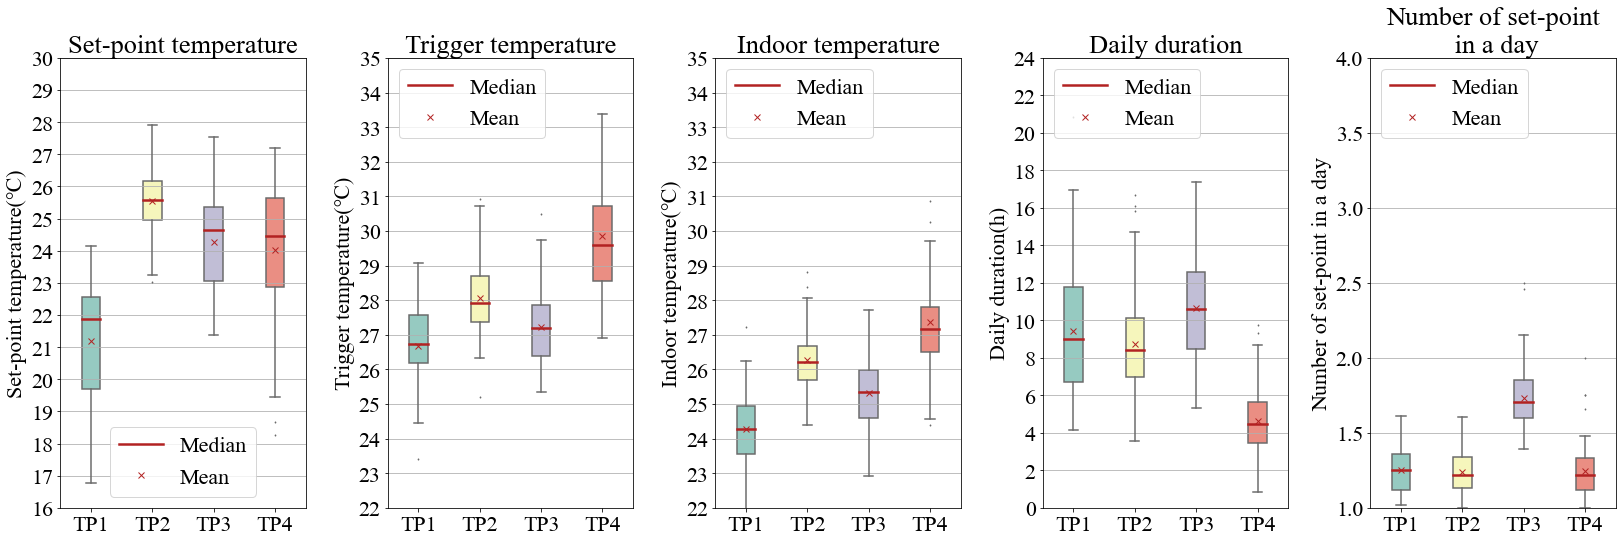

In [37]:
plt.rc("font",family="Times New Roman",size=22)
plt.figure(figsize=(23, 8))

medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='x',markerfacecolor='firebrick',markeredgecolor='firebrick')
m1=mlines.Line2D([],[],linestyle='-', linewidth=2.5, color='firebrick')
m2=mlines.Line2D([],[],linestyle=' ',marker='x',markerfacecolor='firebrick',markeredgecolor='firebrick')

plt.subplot(151)

ax=sns.boxplot(x="thermal_type",y="set_point_weight_mean_mean",fliersize=1,data=dfcluster_result_fs,palette="Set3",width=0.3,**{'showmeans':True,'medianprops':medianprops,'meanprops':meanpointprops}) 
ymajorLocator = MultipleLocator(1)
handles, labels = ax.get_legend_handles_labels()
labels=["Median","Mean"]
handles.append(m1)
handles.append(m2)
plt.legend(handles,labels,loc=8)
ax.yaxis.set_major_locator(ymajorLocator)
plt.ylim((16,30))
plt.xlabel(r"")
plt.ylabel(r"Set-point temperature(℃)")
plt.xticks(np.arange(4),[u"TP1",u"TP2",u"TP3",u"TP4"])
plt.yticks()
ax.grid(axis='y')
plt.title('Set-point temperature')

plt.subplot(152)
ax=sns.boxplot(x="thermal_type",y="trigger_temp_mean",fliersize=1,data=dfcluster_result_fs,palette="Set3",width=0.3,**{'showmeans':True,'medianprops':medianprops,'meanprops':meanpointprops}) 
ymajorLocator = MultipleLocator(1)
handles, labels = ax.get_legend_handles_labels()
labels=["Median","Mean"]
handles.append(m1)
handles.append(m2)
plt.legend(handles,labels,loc=2)
ax.yaxis.set_major_locator(ymajorLocator)
plt.ylim((22,35))
plt.xlabel(r"")
plt.ylabel(r"Trigger temperature(℃)")
plt.xticks(np.arange(4),[u"TP1",u"TP2",u"TP3",u"TP4"])
plt.yticks()
ax.grid(axis='y')
plt.title('Trigger temperature')

plt.subplot(153)
ax=sns.boxplot(x="thermal_type",y="temp_in_mean",fliersize=1,data=dfcluster_result_fs,palette="Set3",width=0.3,**{'showmeans':True,'medianprops':medianprops,'meanprops':meanpointprops}) 
ymajorLocator = MultipleLocator(1)
handles, labels = ax.get_legend_handles_labels()
labels=["Median","Mean"]
handles.append(m1)
handles.append(m2)
plt.legend(handles,labels,loc=2)
ax.yaxis.set_major_locator(ymajorLocator)
plt.ylim((22,35))
plt.xlabel(r"")
plt.ylabel(r"Indoor temperature(℃)")
plt.xticks(np.arange(4),[u"TP1",u"TP2",u"TP3",u"TP4"])
plt.yticks()
ax.grid(axis='y')
plt.title('Indoor temperature')

plt.subplot(154)
ax=sns.boxplot(x="thermal_type",y="duration_mean",fliersize=1,data=dfcluster_result_fs,palette="Set3",width=0.3,**{'showmeans':True,'medianprops':medianprops,'meanprops':meanpointprops}) 
ymajorLocator = MultipleLocator(2)
handles, labels = ax.get_legend_handles_labels()
labels=["Median","Mean"]
handles.append(m1)
handles.append(m2)
plt.legend(handles,labels,loc=2)
ax.yaxis.set_major_locator(ymajorLocator)
plt.ylim((0,24))
plt.xlabel(r"")
plt.ylabel(r"Daily duration(h)")
plt.xticks(np.arange(4),[u"TP1",u"TP2",u"TP3",u"TP4"])
plt.yticks()
ax.grid(axis='y')
plt.title('Daily duration')

plt.subplot(155)
ax=sns.boxplot(x="thermal_type",y="set_point_num_mean",fliersize=1,data=dfcluster_result_fs,palette="Set3",width=0.3,**{'showmeans':True,'medianprops':medianprops,'meanprops':meanpointprops}) 
ymajorLocator = MultipleLocator(0.5)
handles, labels = ax.get_legend_handles_labels()
labels=["Median","Mean"]
handles.append(m1)
handles.append(m2)
plt.legend(handles,labels,loc=2)
ax.yaxis.set_major_locator(ymajorLocator)
plt.ylim((1,4))
plt.xlabel(r"")
plt.ylabel(r"Number of set-point in a day")
plt.xticks(np.arange(4),[u"TP1",u"TP2",u"TP3",u"TP4"])
plt.yticks()
ax.grid(axis='y')
plt.title('Number of set-point\n in a day')

plt.tight_layout()
plt.savefig(r'C:\luyan\fig\fig5b1.jpg',dpi=600)

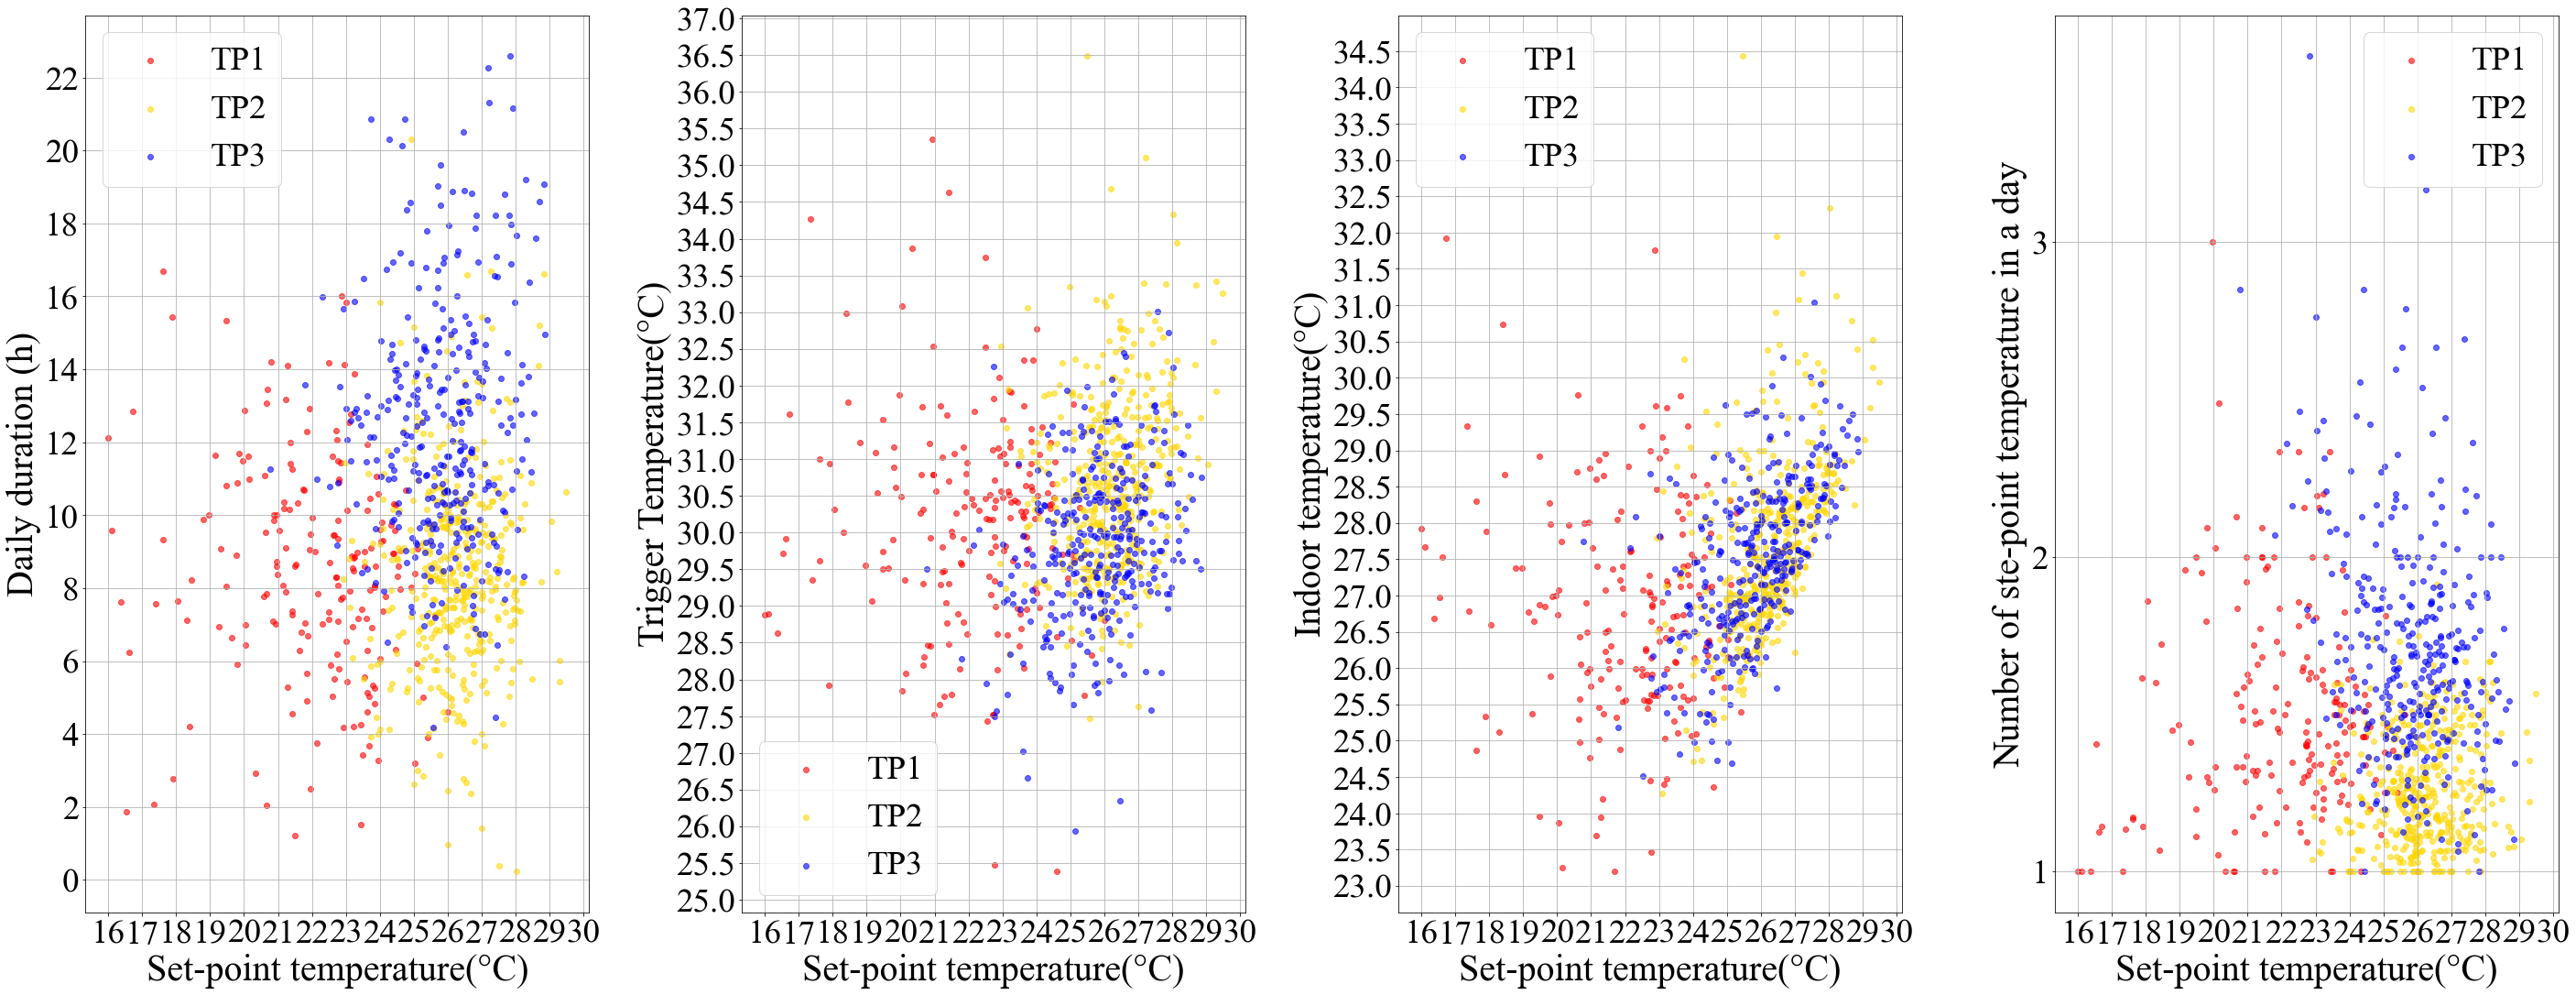

In [31]:
x0=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==0]['set_point_weight_mean_mean']
x1=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==1]['set_point_weight_mean_mean']
x2=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==2]['set_point_weight_mean_mean']


y0_dur=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==0]['duration_mean']
y1_dur=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==1]['duration_mean']
y2_dur=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==2]['duration_mean']


y0_tri=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==0]['trigger_temp_mean']
y1_tri=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==1]['trigger_temp_mean']
y2_tri=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==2]['trigger_temp_mean']

y0_in=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==0]['temp_in_mean']
y1_in=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==1]['temp_in_mean']
y2_in=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==2]['temp_in_mean']

y0_num=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==0]['set_point_num_mean']
y1_num=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==1]['set_point_num_mean']
y2_num=dfcluster_result_wm[dfcluster_result_wm['thermal_type']==2]['set_point_num_mean']



plt.rc("font",family="Times New Roman",size=37)
plt.figure(figsize=(40, 16))
ax = plt.subplot(1,4,1)
ax.scatter(x0, y0_dur, c='r',alpha=0.6,label='TP1')
ax.scatter(x1, y1_dur, c='gold', alpha=0.6,label='TP2')
ax.scatter(x2, y2_dur, c='blue', alpha=0.6,label='TP3')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.set_xlabel(r'Set-point temperature(°C)',fontsize=40)
ax.set_ylabel(r'Daily duration (h)',fontsize=40)
plt.legend()
ax.grid(True)

ax = plt.subplot(1,4,2)
ax.scatter(x0, y0_tri, c='r',alpha=0.6,label='TP1')
ax.scatter(x1, y1_tri, c='gold', alpha=0.6,label='TP2')
ax.scatter(x2, y2_tri, c='blue', alpha=0.6,label='TP3')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_xlabel(r'Set-point temperature(°C)',fontsize=40)
ax.set_ylabel(r'Trigger Temperature(°C)',fontsize=40)
plt.legend()
ax.grid(True)

ax = plt.subplot(1,4,3)
ax.scatter(x0, y0_in, c='r',alpha=0.6,label='TP1')
ax.scatter(x1, y1_in, c='gold', alpha=0.6,label='TP2')
ax.scatter(x2, y2_in, c='blue', alpha=0.6,label='TP3')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_xlabel(r'Set-point temperature(°C)',fontsize=40)
ax.set_ylabel(r'Indoor temperature(°C)',fontsize=40)
plt.legend()
ax.grid(True)


ax = plt.subplot(1,4,4)
ax.scatter(x0, y0_num, c='r',alpha=0.6,label='TP1')
ax.scatter(x1, y1_num, c='gold', alpha=0.6,label='TP2')
ax.scatter(x2, y2_num, c='blue', alpha=0.6,label='TP3')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_xlabel(r'Set-point temperature(°C)',fontsize=40)
ax.set_ylabel(r'Number of ste-point temperature in a day',fontsize=40)
plt.legend()
ax.grid(True)




plt.tight_layout()
plt.savefig(r'C:\luyan\fig\fig5a2.jpg',dpi=600)
plt.show()


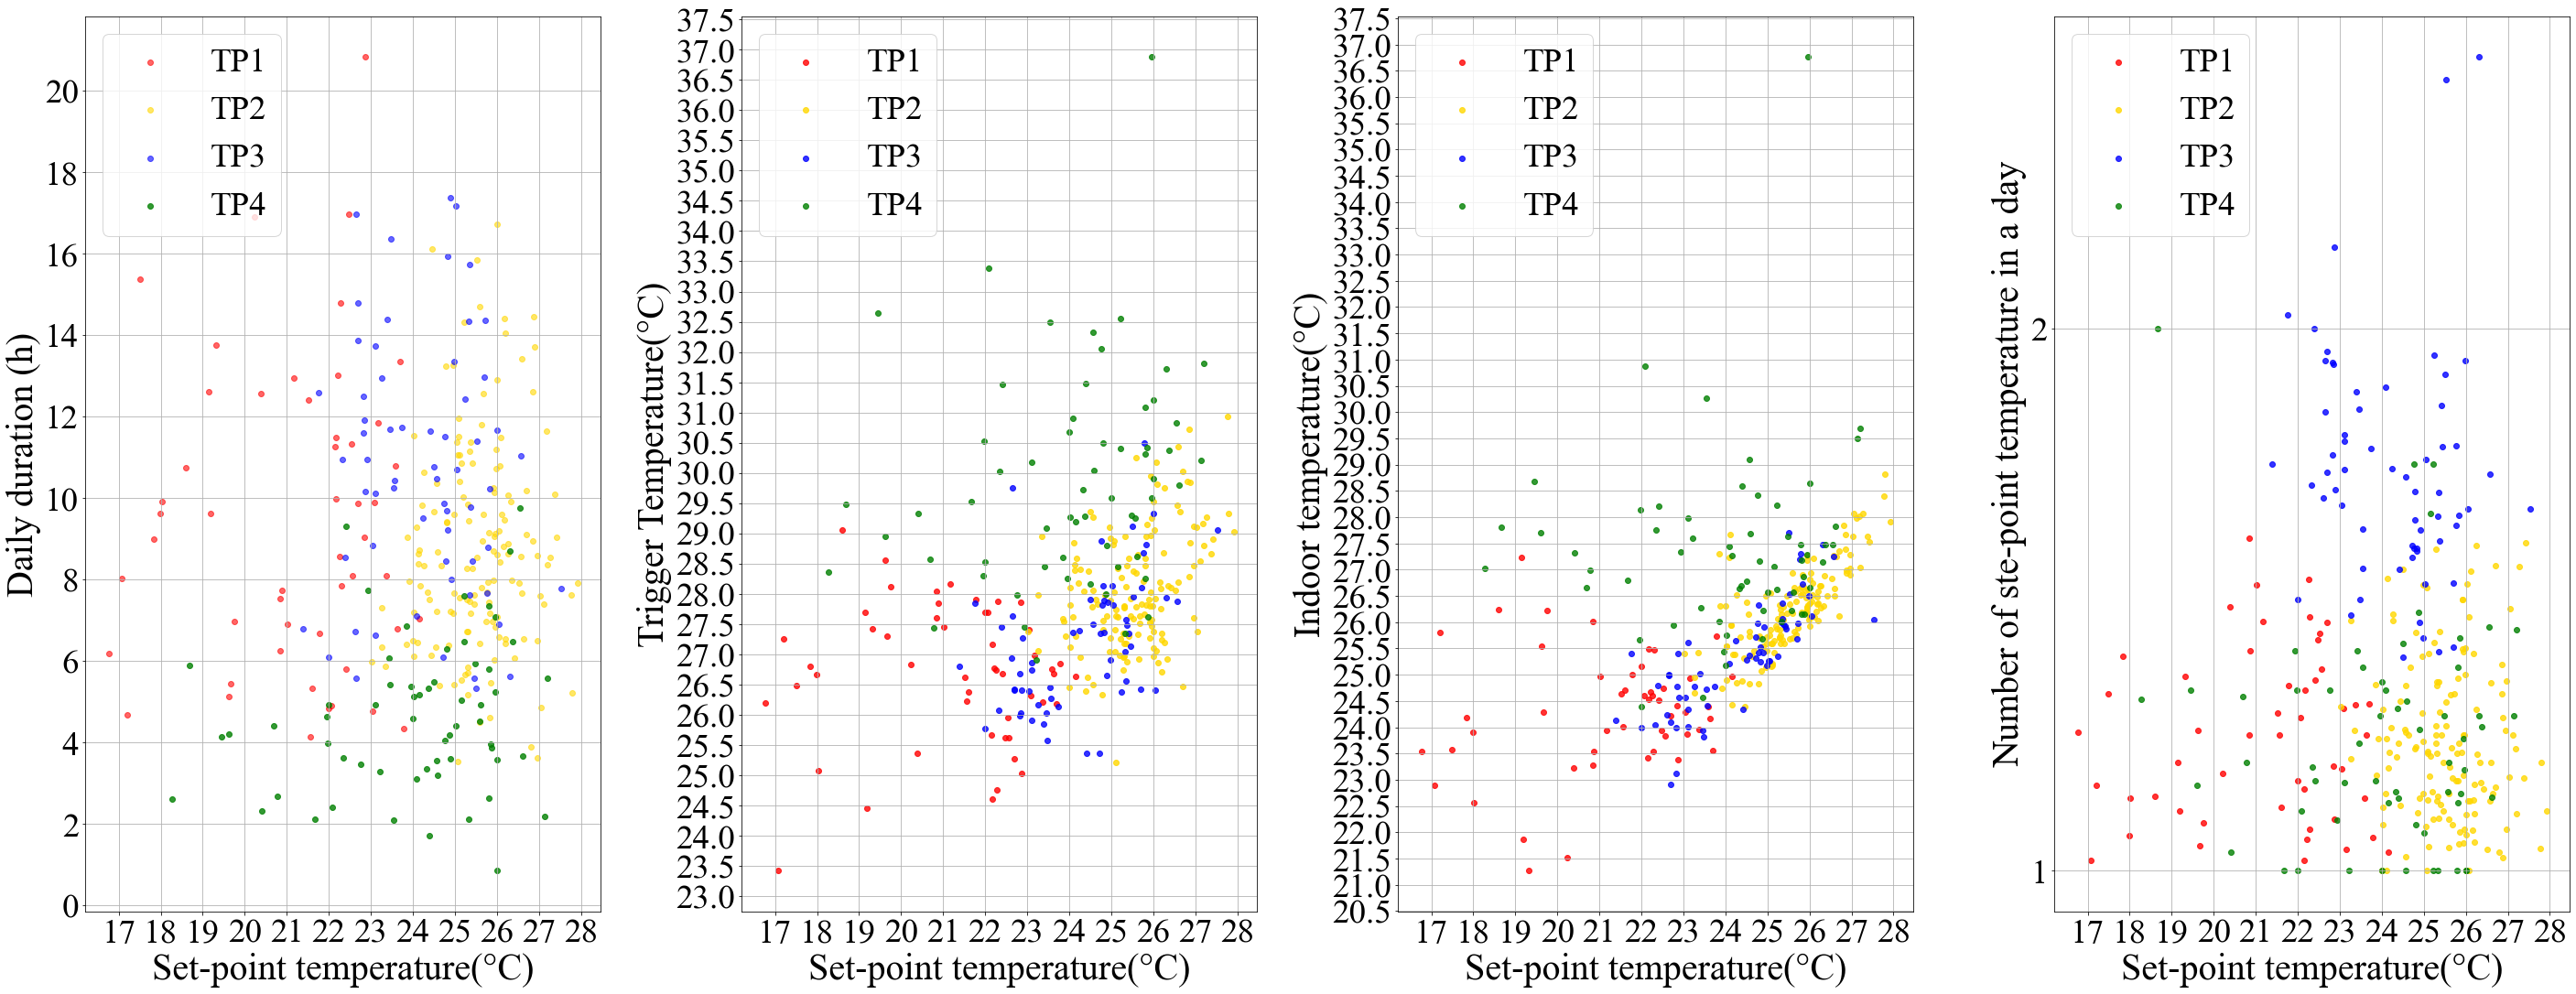

In [30]:
x0=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==0]['set_point_weight_mean_mean']
x1=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==1]['set_point_weight_mean_mean']
x2=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==2]['set_point_weight_mean_mean']
x3=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==3]['set_point_weight_mean_mean']


y0_dur=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==0]['duration_mean']
y1_dur=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==1]['duration_mean']
y2_dur=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==2]['duration_mean']
y3_dur=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==3]['duration_mean']


y0_tri=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==0]['trigger_temp_mean']
y1_tri=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==1]['trigger_temp_mean']
y2_tri=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==2]['trigger_temp_mean']
y3_tri=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==3]['trigger_temp_mean']


y0_in=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==0]['temp_in_mean']
y1_in=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==1]['temp_in_mean']
y2_in=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==2]['temp_in_mean']
y3_in=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==3]['temp_in_mean']

y0_num=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==0]['set_point_num_mean']
y1_num=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==1]['set_point_num_mean']
y2_num=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==2]['set_point_num_mean']
y3_num=dfcluster_result_fs[dfcluster_result_fs['thermal_type']==3]['set_point_num_mean']



plt.rc("font",family="Times New Roman",size=37)
plt.figure(figsize=(40, 16))
ax = plt.subplot(1,4,1)
ax.scatter(x0, y0_dur, c='r',alpha=0.6,label='TP1')
ax.scatter(x1, y1_dur, c='gold', alpha=0.6,label='TP2')
ax.scatter(x2, y2_dur, c='blue', alpha=0.6,label='TP3')
ax.scatter(x3, y3_dur, c='green', alpha=0.8,label='TP4')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.set_xlabel(r'Set-point temperature(°C)',fontsize=40)
ax.set_ylabel(r'Daily duration (h)',fontsize=40)
plt.legend()
ax.grid(True)

ax = plt.subplot(1,4,2)
ax.scatter(x0, y0_tri, c='r',alpha=0.8,label='TP1')
ax.scatter(x1, y1_tri, c='gold', alpha=0.8,label='TP2')
ax.scatter(x2, y2_tri, c='blue', alpha=0.8,label='TP3')
ax.scatter(x3, y3_tri, c='green', alpha=0.8,label='TP4')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_xlabel(r'Set-point temperature(°C)',fontsize=40)
ax.set_ylabel(r'Trigger Temperature(°C)',fontsize=40)
plt.legend()
ax.grid(True)

ax = plt.subplot(1,4,3)
ax.scatter(x0, y0_in, c='r',alpha=0.8,label='TP1')
ax.scatter(x1, y1_in, c='gold', alpha=0.8,label='TP2')
ax.scatter(x2, y2_in, c='blue', alpha=0.8,label='TP3')
ax.scatter(x3, y3_in, c='green', alpha=0.8,label='TP4')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_xlabel(r'Set-point temperature(°C)',fontsize=40)
ax.set_ylabel(r'Indoor temperature(°C)',fontsize=40)
plt.legend()
ax.grid(True)


ax = plt.subplot(1,4,4)
ax.scatter(x0, y0_num, c='r',alpha=0.8,label='TP1')
ax.scatter(x1, y1_num, c='gold', alpha=0.8,label='TP2')
ax.scatter(x2, y2_num, c='blue', alpha=0.8,label='TP3')
ax.scatter(x3, y3_num, c='green', alpha=0.8,label='TP4')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_xlabel(r'Set-point temperature(°C)',fontsize=40)
ax.set_ylabel(r'Number of ste-point temperature in a day',fontsize=40)
plt.legend()
ax.grid(True)




plt.tight_layout()
plt.savefig(r'C:\luyan\fig\fig5b2.jpg',dpi=600)
plt.show()



In [11]:
#dfcluster_result_wm.to_csv(r'C:\luyan\paper_code\data\thermal_cluster_label_wm.csv')
#dfcluster_result_fs.to_csv(r'C:\luyan\paper_code\data\thermal_cluster_label_fs.csv')